In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, StratifiedKFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Define the raw URLs for the CSV files
url_X_train = 'https://raw.githubusercontent.com/vinthagunasekhar/breast-cancer-detection-machinelearning/main/X_train.csv'
url_X_test = 'https://raw.githubusercontent.com/vinthagunasekhar/breast-cancer-detection-machinelearning/main/X_test.csv'
url_y_train = 'https://raw.githubusercontent.com/vinthagunasekhar/breast-cancer-detection-machinelearning/main/y_train.csv'
url_y_test = 'https://raw.githubusercontent.com/vinthagunasekhar/breast-cancer-detection-machinelearning/main/y_test.csv'

# Read the CSV files into DataFrames with error handling
try:
    X_train = pd.read_csv(url_X_train, delimiter=',', on_bad_lines='skip')
    X_test = pd.read_csv(url_X_test, delimiter=',', on_bad_lines='skip')
    y_train = pd.read_csv(url_y_train, delimiter=',', on_bad_lines='skip')
    y_test = pd.read_csv(url_y_test, delimiter=',', on_bad_lines='skip')
    
    # Display the first few rows of each DataFrame
    print("X_train:")
    print(X_train.head())

    print("X_test:")
    print(X_test.head())

    print("y_train:")
    print(y_train.head())

    print("y_test:")
    print(y_test.head())

except pd.errors.ParserError as e:
    print(f"Error reading CSV files: {e}")



X_train:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    9.029     17.33       58.79   250.5      0.10660       0.14130   
1   21.090     26.57      142.70  1311.0      0.11410       0.28320   
2    9.173     13.86       59.20   260.9      0.07721       0.08751   
3   10.650     25.22       68.01   347.0      0.09657       0.07234   
4   10.170     14.88       64.55   311.9      0.11340       0.08061   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0     0.31300          0.04375     0.2111             0.08046  ...    10.31   
1     0.24870          0.14960     0.2395             0.07398  ...    26.68   
2     0.05988          0.02180     0.2341             0.06963  ...    10.01   
3     0.02379          0.01615     0.1897             0.06329  ...    12.25   
4     0.01084          0.01290     0.2743             0.06960  ...    11.02   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     22.65    

In [3]:
scoring = { 

    'accuracy': 'accuracy', 

    'precision': make_scorer(precision_score, average='weighted'), 

    'recall': make_scorer(recall_score, average='weighted'), 

    'f1': make_scorer(f1_score, average='weighted'), 

    'roc_auc': 'roc_auc_ovr_weighted' 

} 

 

# Use StratifiedKFold for cross-validation 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

 

# Define pipelines 

lr_pipeline = Pipeline([ 

    ('scaler', StandardScaler()), 

    ('lr', LogisticRegression(max_iter=10000)) 

]) 

 

svm_pipeline = Pipeline([ 

    ('scaler', StandardScaler()), 

    ('svc', SVC(probability=True)) 

]) 

 

xgb_pipeline = Pipeline([ 

    ('scaler', StandardScaler()), 

    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')) 

]) 

 

# Define parameter distributions 

param_dist_lr = { 

    'lr__C': np.logspace(-4, 4, 20), 

    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'] 

} 

 

param_dist_svc = { 

    'svc__C': np.logspace(-4, 4, 20), 

    'svc__kernel': ['linear', 'rbf', 'poly'], 

    'svc__gamma': np.logspace(-4, 4, 20) 

} 

 

param_dist_xgb = { 

    'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9], 

    'xgb__learning_rate': np.linspace(0.01, 0.3, 30), 

    'xgb__n_estimators': [100, 200, 300, 400, 500], 

    'xgb__subsample': np.linspace(0.5, 1.0, 10) 

} 

In [4]:
# Perform RandomizedSearchCV 

def perform_random_search(pipeline, param_dist, name): 

    random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=100, cv=skf, scoring='roc_auc_ovr_weighted', random_state=42, n_jobs=-1) 

    random_search.fit(X_train, y_train) 

    print(f"Best parameters for {name}:", random_search.best_params_) 

    return random_search.best_estimator_ 

 

best_lr = perform_random_search(lr_pipeline, param_dist_lr, "Logistic Regression") 

best_svc = perform_random_search(svm_pipeline, param_dist_svc, "SVM") 

best_xgb = perform_random_search(xgb_pipeline, param_dist_xgb, "XGBoost") 

C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for Logistic Regression: {'lr__solver': 'liblinear', 'lr__C': 0.615848211066026}


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for SVM: {'svc__kernel': 'rbf', 'svc__gamma': 0.012742749857031334, 'svc__C': 4.281332398719396}
Best parameters for XGBoost: {'xgb__subsample': 0.6666666666666666, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.3}


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:38:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
# Evaluate models using cross-validation on the training set 

def evaluate_model(model, name): 

    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring) 

    print(f"\nCross-validation results for {name}:") 

    for metric, value in scores.items(): 

        print(f"{metric}: {value.mean():.3f} (+/- {value.std() * 2:.3f})") 

    return scores 

 

scores_lr = evaluate_model(best_lr, "Logistic Regression") 

scores_svc = evaluate_model(best_svc, "SVM") 

scores_xgb = evaluate_model(best_xgb, "XGBoost") 

C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-pack


Cross-validation results for Logistic Regression:
fit_time: 0.006 (+/- 0.001)
score_time: 0.023 (+/- 0.002)
test_accuracy: 0.978 (+/- 0.020)
test_precision: 0.978 (+/- 0.020)
test_recall: 0.978 (+/- 0.020)
test_f1: 0.978 (+/- 0.020)
test_roc_auc: 0.995 (+/- 0.011)


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-pack


Cross-validation results for SVM:
fit_time: 0.006 (+/- 0.010)
score_time: 0.024 (+/- 0.013)
test_accuracy: 0.976 (+/- 0.026)
test_precision: 0.977 (+/- 0.024)
test_recall: 0.976 (+/- 0.026)
test_f1: 0.976 (+/- 0.026)
test_roc_auc: 0.996 (+/- 0.010)


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:38:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:38:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:38:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame


Cross-validation results for XGBoost:
fit_time: 0.062 (+/- 0.004)
score_time: 0.023 (+/- 0.001)
test_accuracy: 0.960 (+/- 0.038)
test_precision: 0.961 (+/- 0.039)
test_recall: 0.960 (+/- 0.038)
test_f1: 0.960 (+/- 0.038)
test_roc_auc: 0.993 (+/- 0.011)


In [6]:
# Final evaluation on the test set 

def final_evaluate(model, name): 
    y_pred = model.predict(X_test) 
    y_proba = model.predict_proba(X_test)[:, 1] 
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 

    recall = recall_score(y_test, y_pred, average='weighted') 

    f1 = f1_score(y_test, y_pred, average='weighted') 

    roc_auc = roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr') 

    print(f"\nFinal test set results for {name}:") 

    print(f"Accuracy: {accuracy:.3f}") 

    print(f"Precision: {precision:.3f}") 

    print(f"Recall: {recall:.3f}") 

    print(f"F1 Score: {f1:.3f}") 

    print(f"ROC AUC: {roc_auc:.3f}") 

 

final_evaluate(best_lr, "Logistic Regression") 

final_evaluate(best_svc, "SVM") 

final_evaluate(best_xgb, "XGBoost")


Final test set results for Logistic Regression:
Accuracy: 0.974
Precision: 0.974
Recall: 0.974
F1 Score: 0.974
ROC AUC: 0.997

Final test set results for SVM:
Accuracy: 0.982
Precision: 0.983
Recall: 0.982
F1 Score: 0.982
ROC AUC: 0.997

Final test set results for XGBoost:
Accuracy: 0.974
Precision: 0.974
Recall: 0.974
F1 Score: 0.974
ROC AUC: 0.992


In [7]:
# Plot ROC curves and confusion matrices 

def plot_roc_curve(model, X, y, label): 

    y_probs = model.predict_proba(X)[:, 1] 

    fpr, tpr, _ = roc_curve(y, y_probs) 

    roc_auc = auc(fpr, tpr) 

     

    plt.figure() 

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})') 

    plt.plot([0, 1], [0, 1], 'k--') 

    plt.xlim([0.0, 1.0]) 

    plt.ylim([0.0, 1.05]) 

    plt.xlabel('False Positive Rate') 

    plt.ylabel('True Positive Rate') 

    plt.title(f'ROC Curve - {label}') 

    plt.legend(loc="lower right") 

    plt.show() 

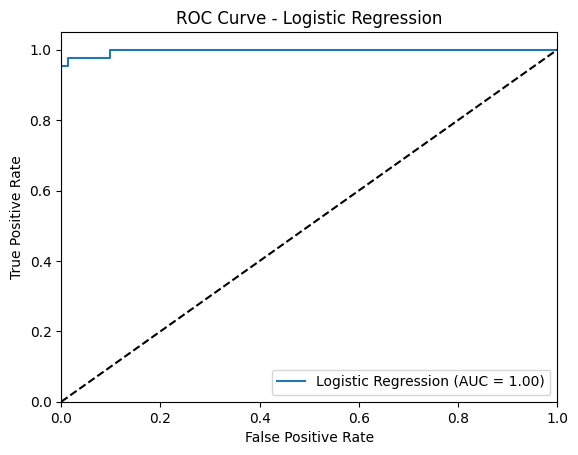

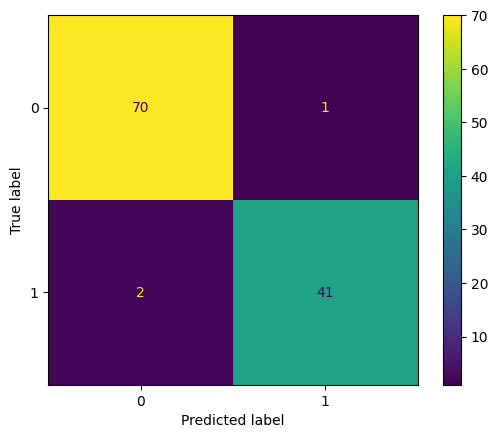

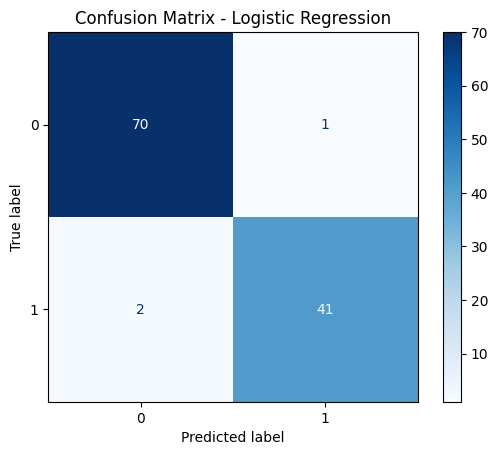

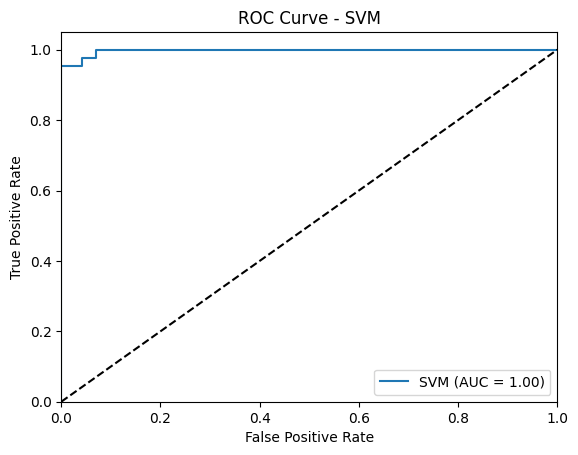

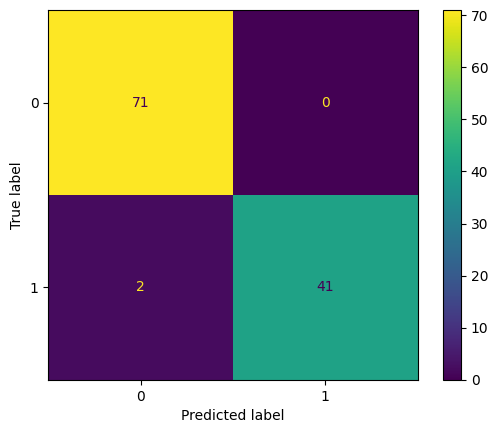

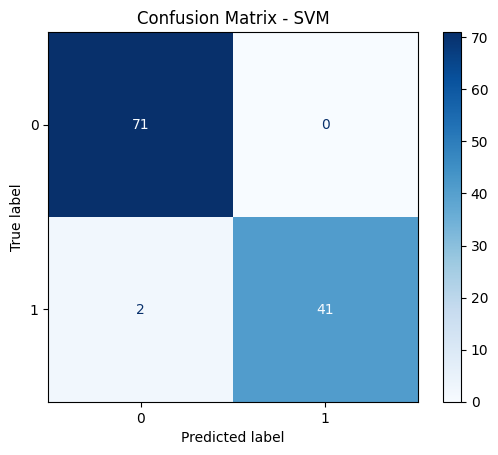

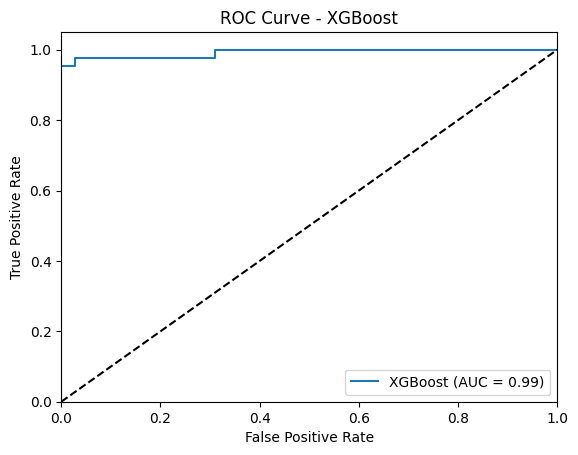

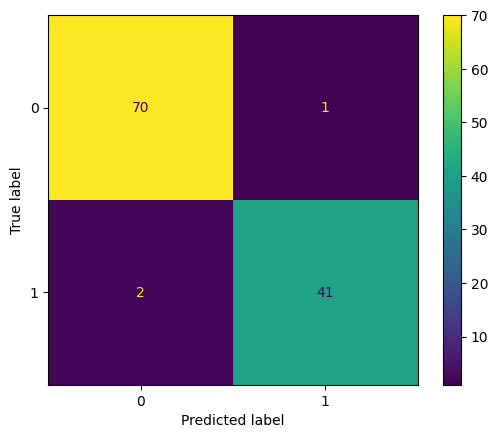

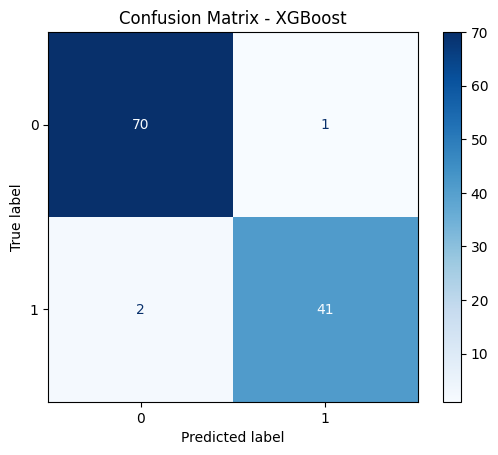

In [8]:
def plot_confusion_matrix(model, X, y, title): 

    y_pred = model.predict(X) 

    cm = ConfusionMatrixDisplay.from_predictions(y, y_pred) 

    cm.plot(cmap=plt.cm.Blues) 

    plt.title(title) 

    plt.show() 

 

for model, name in zip([best_lr, best_svc, best_xgb], ['Logistic Regression', 'SVM', 'XGBoost']): 

    plot_roc_curve(model, X_test, y_test, name) 

    plot_confusion_matrix(model, X_test, y_test, f'Confusion Matrix - {name}') 

 



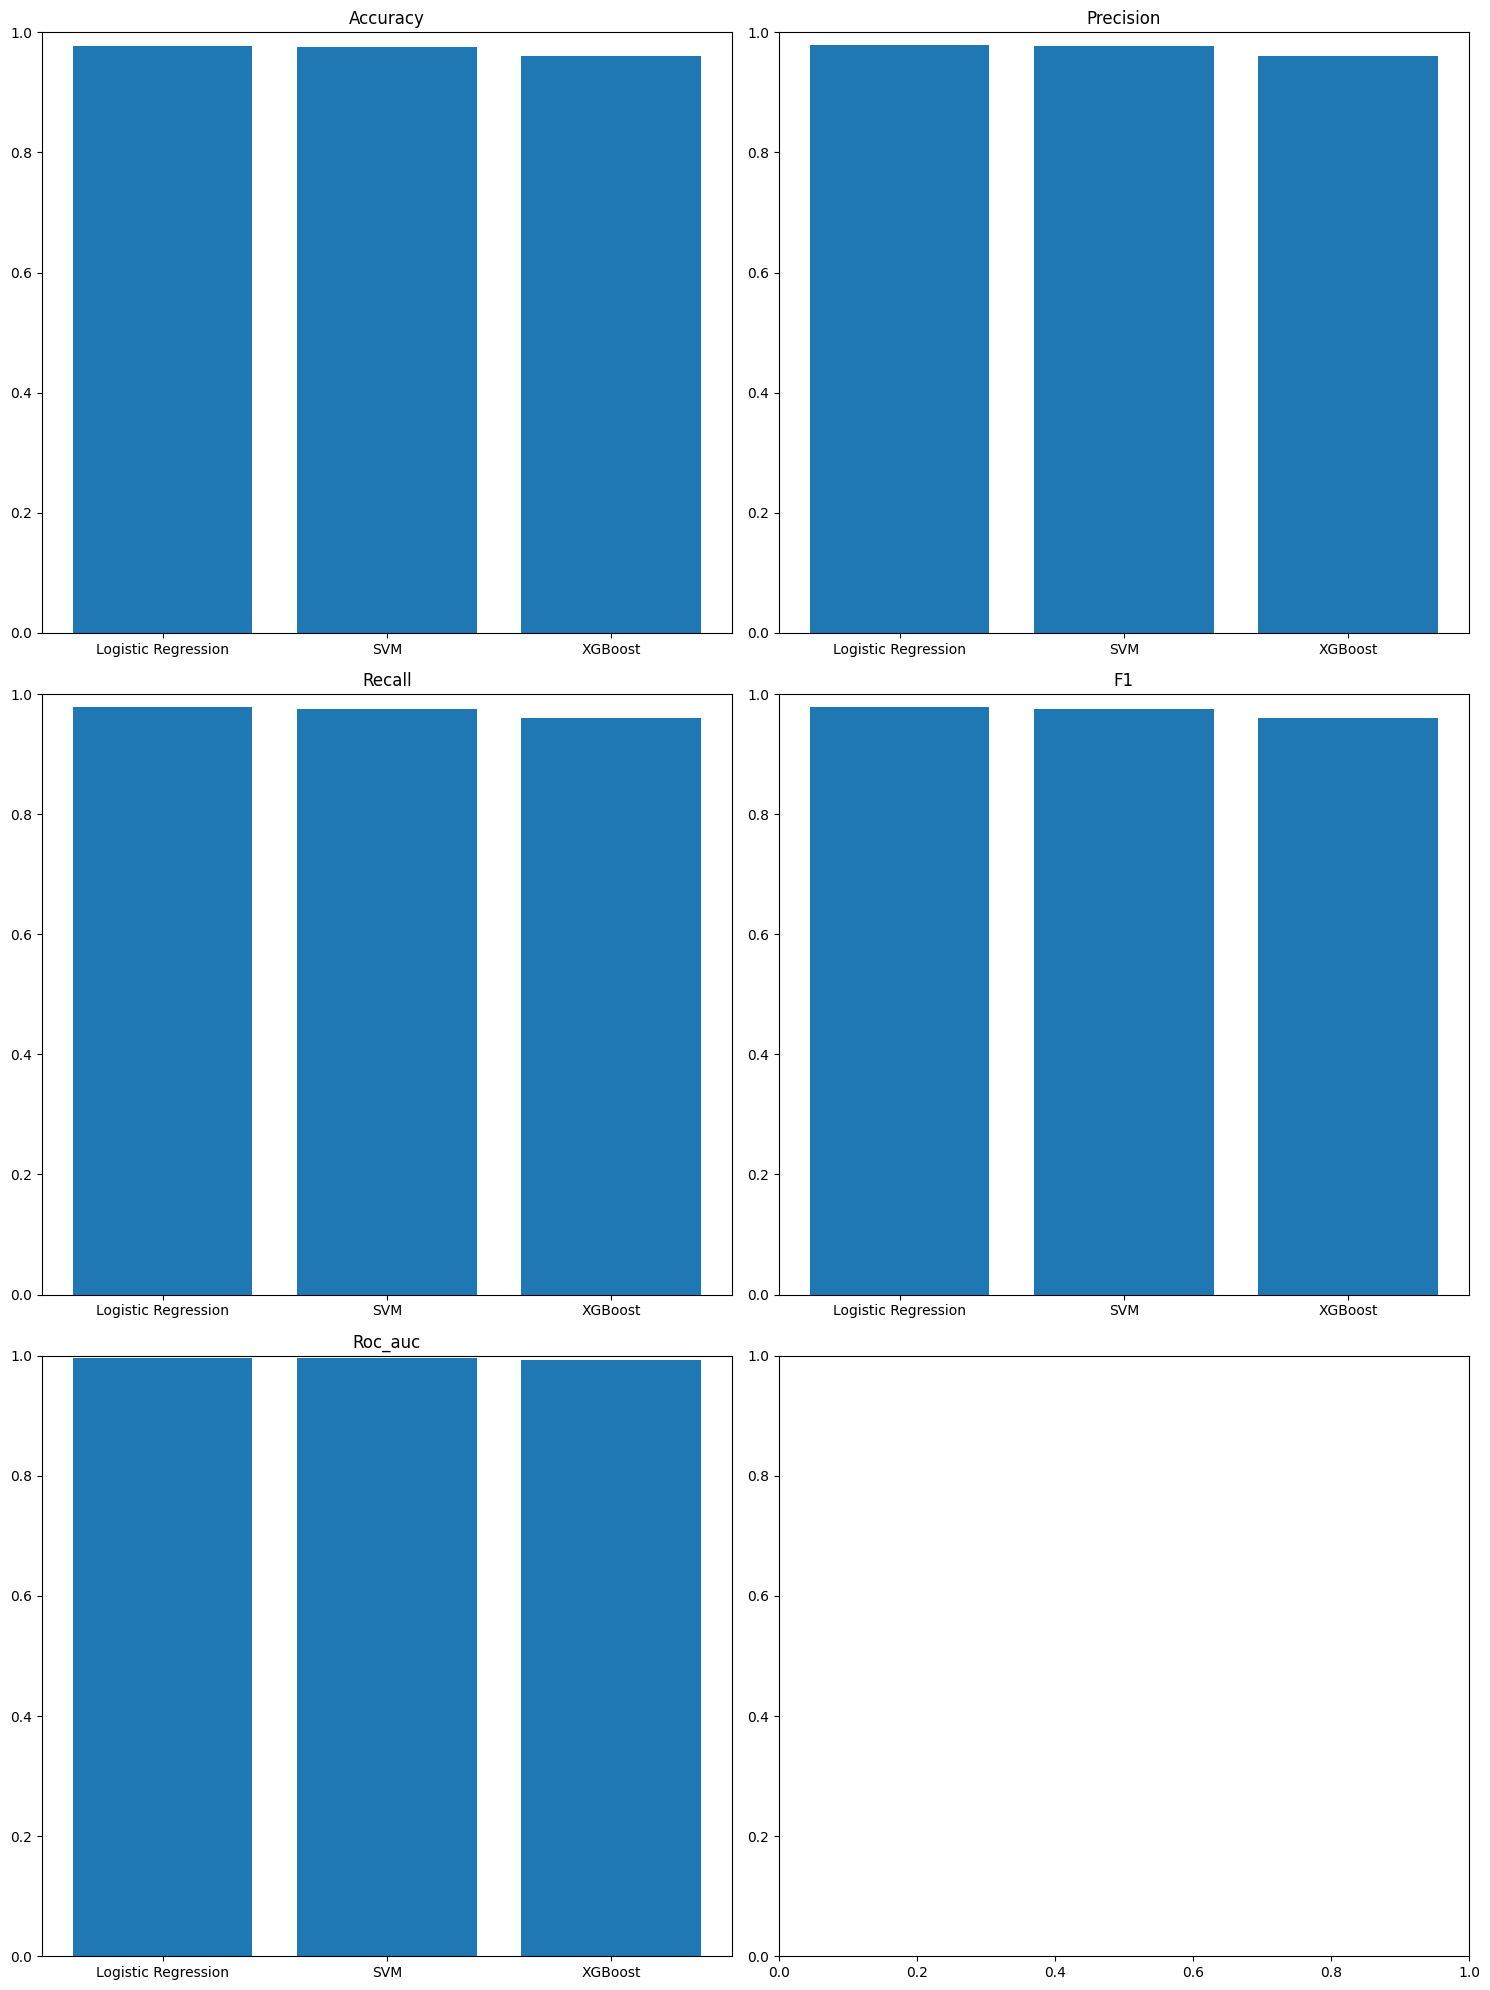

In [9]:
# Plotting the Results 

models = ['Logistic Regression', 'SVM', 'XGBoost'] 

metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc'] 

all_scores = [scores_lr, scores_svc, scores_xgb] 

 

fig, axes = plt.subplots(3, 2, figsize=(15, 20)) 

axes = axes.flatten() 

 

for i, metric in enumerate(metrics): 

    values = [scores[metric].mean() for scores in all_scores] 

    axes[i].bar(models, values) 

    axes[i].set_title(metric.replace('test_', '').capitalize()) 

    axes[i].set_ylim(0, 1) 

 

plt.tight_layout() 

plt.show() 